<a href="https://colab.research.google.com/github/s1063724/2024python_analysis/blob/main/example/0117%E7%B5%B1%E8%A8%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#：1. 描述統計; 2.檢定
#Python 估計與檢定
#統計資料分析
# 估計 (Estimation): 樣本 (smaple), 台灣抽菸人口百分比? 母體 (population) -> 抽樣 1000. (平均數)
# 假設檢定 (Hypothesis Testing): *黃色小熊會被12歲的小朋友喜愛
#----------------
#母數 (parameters): 母體特徵的平均數和標準差這些指標
#σ(sigma): 母體的標準差 μ(mu):母體的平均數, *樣本的標準差 S,平均數 X (bar)
#母體資料分配型態: 常態分配 (Normal Distribution)

#抽樣: 樣本資料 (sampling data)
#1. 簡單隨機抽樣: Python 串列, 500 抽1 (隨機或是一定與比率抽)
#2. 系統抽樣: 先隨機選取, 後以母體大小除以樣本大小的間距進行抽樣。例如:第1次抽到11, 母體10000: 200 樣本, 10000/200=50, 所以第二個樣本 61, 第三個111
#3. 分層抽樣 (stratified sampling): strata 層
#4. 叢集抽樣:地區別或是組織別

In [ ]:
#資料標準化: 使用【標準分數】(standard score) - Z (Z-score) (data science, 資料科學家)
#練習：在 Facebook 隨機選 24 個朋友樣本, 記下每個朋友的朋友數
import pandas as pd
friends = [110, 1017, 1127, 417, 624, 957, 89,
           951, 947, 797, 981, 125, 455, 731,
           1641, 486, 1307, 472, 1131, 1771, 905,
           532, 742, 633]
s_friends = pd.Series(friends)
# describe()描述資料內容
print(s_friends.describe())

count      24.000000
mean      789.500000
std       433.835874
min        89.000000
25%       482.500000
50%       769.500000
75%       990.000000
max      1771.000000
dtype: float64


In [ ]:
# 用 Z-score 表達朋友數
m = s_friends.mean()
print('平均數: ', m)
s = s_friends.std()
print('標準差: ', s)

# (各值 - 平均數) / 標準差(變異數) （x-μ）/σ
# 先放一個空串列(list)
z_score = []
for x in friends:
  z = (x - m)/s
  z_score.append(z)

print(z_score)

平均數:  789.5
標準差:  433.83587359437126
[-1.566260517762808, 0.5243918584121248, 0.777943965776229, -0.8586196363011713, -0.3814806706250842, 0.38609070894079517, -1.6146659200777733, 0.3722605939936622, 0.36304051736224024, 0.017287643683916203, 0.441411168729327, -1.5316852303949755, -0.7710289083026626, -0.13484362073454637, 1.9627238129139528, -0.6995733144091423, 1.192847414190218, -0.7318435826191192, 0.787164042407651, 2.262376303435167, 0.2662297127323095, -0.5935424331477895, -0.10948840999813594, -0.3607354982043847]


[6][3][4][1][1][1][2][4][3][6][3][3][5][5][4][2][2][5][6][6][6][2][3][1][4][2][1][2][4][5][6][5][2][1][5][5][3][6][3][3][6][1][3][4][1][3][6][4][2][3][2][1][4][2][4][2][2][2][4][4][6][5][1][6][3][5][6][2][1][4][2][1][3][3][5][2][1][3][5][1][2][1][3][4][2][6][6][2][2][3][6][3][2][5][2][2][4][2][4][4]

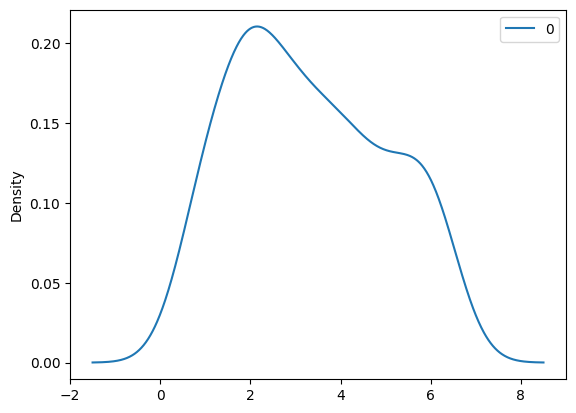

In [ ]:
# 中央極限定理: 抽樣數夠大, 都幾乎會是常態分配
import matplotlib.pyplot as plt
import numpy as np
dice = [1, 2, 3, 4, 5, 6]
sample_means = []
for x in range(100):
  # size一次出現幾個值
  sample = np.random.choice(a=dice, size=1)
  sample_means.append(sample.mean())
  print(sample, end = '')
df = pd.DataFrame(sample_means)
# density:密度
df.plot(kind='density')
plt.show()

In [ ]:
#估計
#點估計 (point estimation): 民調調查結果,所有的選民有 45% 投給 2 號候選人
#區間估計 (interval estimate):全國 30%-48% 會投給 1 號候選人
#甚麼是好的估計: 1. 不 偏差 (bias); 2. 有效; 3. 一致性

population = []
for x in range(10000):
  sample = np.random.choice(a=dice, size=100)
  population.append(sample.mean())
print(sample)
print('母體的平均數: ', sum(population)/10000)

size_range = [10, 100, 1000]
for sample_size in size_range:
  sample = np.random.choice(a=population, size=sample_size)
  sample_mean = sample.mean()
  print(sample_size, '樣本平均數', sample_mean)

[6 4 2 6 1 6 2 2 6 2 6 4 6 4 4 4 3 4 4 3 3 4 4 1 3 6 2 1 2 2 1 1 3 3 1 6 3
 2 2 5 2 4 2 4 3 5 4 5 3 4 3 3 5 5 1 1 1 1 5 2 2 2 1 5 2 3 2 6 2 3 6 3 2 4
 2 2 1 5 2 1 6 1 6 3 3 3 6 2 4 6 5 4 1 1 4 1 3 3 2 2]
母體的平均數:  3.499222999999992
10 樣本平均數 3.528
100 樣本平均數 3.5126999999999997
1000 樣本平均數 3.4973199999999998


In [ ]:
# 區間估計: 例如：國內男性身高 95% 機率是在 161-179 公分之間
# 95% 機率: 信賴係數 (confidence coefficent), 信賴水準
# 161-179 公分: 信賴區間 (confidence intervals)
# 95% 會準確, 顯著水準, 99%

# 進行區間估計的步驟: 1. 決定信賴係數; 2. 查詢 Z  分配表; 3.獲得信賴區間值

population = []
for x in range(10000):
  sample = np.random.choice(a=dice, size=100)
  population.append(sample.mean())
print('母體平均數: ', sum(population)/10000)

母體平均數:  3.4998510000000045


In [ ]:
import math
sample_size = 100
sample = np.random.choice(a=population, size=sample_size)
sample_mean = sample.mean()
print('樣本平均:', sample_mean)
sample_stdev = sample.std()
print('樣本標準差:', sample_stdev)

sigma = sample_stdev / math.sqrt(sample_size - 1)
print('樣本計算出的母體標準差:', sigma)
# 開根號((樣本各值-樣本平均)^2 / 樣本數)
for x in sample:
  # 算術平均數(arth_mean)=各值-均值
  arth_mean = x-sample_mean
  mother_v = math.sqrt(math.pow(arth_mean, 2)/sample_size)
print('母體樣本標準差: ',mother_v)

樣本平均: 3.4709
樣本標準差: 0.1588716148341169
樣本計算出的母體標準差: 0.015967198067958387
母體樣本標準差:  0.019090000000000006


In [ ]:
#範例問題 1 (自由練習)：學校有一些交換學生, 有人認為交換生成績比較好, 有人不認為。怎麼證明?
# 交換學樣本 100 個學生, 成績平均是 71.5 分; 從教務處得到全校學生的平均成績 70分; 母體的標準差: 2.5
# H0: 交換生的成績和全校平均成績相同。
# Ha: 不相同
import numpy as np
from scipy import stats
import math

population_mean = 70
sample_size = 100
sample_mean = 71.5
print('樣本平均:', sample_mean)
sigma = 2.5

z_obtained = (sample_mean - population_mean)/(sigma/math.sqrt(sample_size))
print('Z 檢定統計量: ', z_obtained) #-> =6, 表示 71.5 離假設母體平均數 70 有 6 個標準差之遠, 故沒有落在信賴區間內
# 常態分佈q:計算誤差(信心水準)
z_critical = stats.norm.ppf(q= 0.975)
print('Z 分數: ', z_critical)

樣本平均: 71.5
Z 檢定統計量:  6.0
Z 分數:  1.959963984540054


In [ ]:
#範例 2 (自由練習):
#披薩店希望各種披薩的銷售量相同, 能夠方便備料 (30份)
#蔬菜 20 地中海 16, 總匯 34, 夏威夷 40, 海鮮 38, 燻雞 32
#H0: 披薩的銷售量與期望銷售量相同
#Ha: 銷售量不一致

# 銷售量(觀察值)
observed = np.array([20, 16, 34, 40, 38, 32])
# 期望值
expected = np.array([30, 30, 30, 30, 30, 30])
# 資料量(自由度)
df = len(observed) - 1
print('自由度:', df)
x =((observed-expected)**2)/expected
print(x)
chi_squared_stat = (((observed-expected)**2)/expected).sum()
print('卡方檢定統計量:', chi_squared_stat)
chi_squared, p_value = stats.chisquare(f_obs=observed, f_exp=expected)

print('卡方檢定 = ', chi_squared, '\np值 =', p_value)
crit = stats.chi2.ppf(q = 0.95, df=df)
print('臨界區: ', crit)
# p值為0.0068 < 0.05 (95%的例外)，所以拒絕虛無假設(不成立) -> 銷售量不一致


自由度: 5
[3.33333333 6.53333333 0.53333333 3.33333333 2.13333333 0.13333333]
卡方檢定統計量: 16.0
卡方檢定 =  16.0 
p值 = 0.006844073922420431
臨界區:  11.070497693516351


    phone_used  score
0          0.0     87
1          0.0     89
2          0.0     91
3          1.0     90
4          1.3     82
5          1.5     80
6          2.0     78
7          2.2     81
8          2.6     76
9          3.2     85
10         4.1     80
11         4.4     73
12         5.0     72


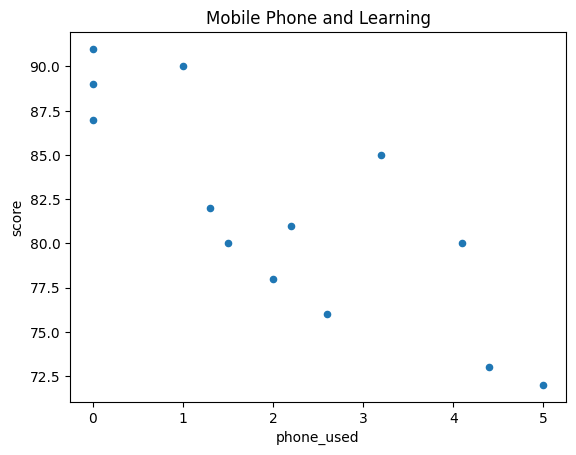

In [ ]:
#範例 3
#學生每日使用手機時間與學習分數有相關

# 使用小時
hours_phone_used = [0, 0, 0, 1, 1.3, 1.5, 2, 2.2, 2.6, 3.2, 4.1, 4.4, 5]
# 成績
score = [87, 89, 91, 90, 82, 80, 78, 81, 76, 85, 80, 73, 72]

df = pd.DataFrame({'phone_used': hours_phone_used, 'score':score})
print(df)
df.plot(kind='scatter', x='phone_used', y='score')
plt.title('Mobile Phone and Learning')
plt.show()
#1.統計方式:平均值, 看變異的程度
#2.相關係數